In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the dataset and get an overview
df = pd.read_excel('Dataset_Final_v6.xlsx')
df.head()

,Project name,State,Country,Type,Sub-Category,Year started,Year ended,Duration (Years),Budget,Restarts,...,Statement of Requirements,Planning,Expectations,Requirements & Specifications,Changing Requirements & Specifications,Technical Competence,Resources Availability,IT Management,Technical Literacy,User satisfaction
0,Robodebt scheme,Failed,Australia,Government,Finance,2015.0,2019.0,4.0,$1.5 billion AUD,No,...,Unclear,Poor,Unrealistic,Incomplete,Frequently changing,Low,Inadequate,Poor,Low,Low
1,Queensland's Health Payroll System,Failed,Australia,Government,Healthcare,2010.0,2016.0,6.0,$1.25 billion AUD,Yes,...,Unclear,Poor,Unrealistic,Incomplete,Unstable,Low,Inadequate,Poor,Low,Low
2,Myki smart Card system,Failed,Australia,Government,Transportation,2009.0,NaN,NaN,$1.5 billion AUD,Yes,...,Unclear,Poor,Unrealistic,Incomplete,Stable,High,Adequate,Strong,High,High
3,CHESS Replacement (Clearing House Electronic S...,Failed,Australia,Non-government,Finance,2017.0,NaN,NaN,$245 million AUD,No,...,Clear,Proper,Realistic,Complete,Stable,High,Adequate,Strong,High,Low
4,Panorama,Failed,Canada,Government,Health,2004.0,NaN,NaN,$147 million CAD,No,...,Unclear,Poor,Unrealistic,Incomplete,Unstable,Low,Inadequate,Poor,Low,Low


In [39]:
df.shape

(166, 25)

=> The dataset has 166 rows and 25 columns

In [40]:
# Check if there's any missing values or abnormal data and check datatypes of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Project name                            166 non-null    object 
 1   State                                   166 non-null    object 
 2   Country                                 166 non-null    object 
 3   Type                                    166 non-null    object 
 4   Sub-Category                            166 non-null    object 
 5   Year started                            164 non-null    float64
 6   Year ended                              159 non-null    float64
 7   Duration (Years)                        158 non-null    float64
 8   Budget                                  129 non-null    object 
 9   Restarts                                103 non-null    object 
 10  Cost overruns                           154 non-null    object

Except for 'Year started', 'Year ended' and 'Duration (Years)' which are continuous data, all other variables are categorical data.

In [41]:
# Check missing values
missing_values = df.isnull().sum()
missing_values

Project name                               0
State                                      0
Country                                    0
Type                                       0
Sub-Category                               0
Year started                               2
Year ended                                 7
Duration (Years)                           8
Budget                                    37
Restarts                                  63
Cost overruns                             12
Time overruns                              4
Content deficiency                         9
User Involvement                          22
Executive Management                       5
Statement of Requirements                 10
Planning                                  18
Expectations                              10
Requirements & Specifications             15
Changing Requirements & Specifications    17
Technical Competence                      21
Resources Availability                     8
IT Managem

As this is a classification problem, we will just keep n/a values and consider it a new label.

### Descriptive analysis

In [42]:
# Statistics summary of the numerical data
numerical_summary = pd.DataFrame(df.describe())
numerical_summary

,Year started,Year ended,Duration (Years)
count,164.000000,159.000000,158.000000
mean,2012.432927,2018.226415,5.791139
std,8.543739,6.936351,5.159931
min,1980.000000,1992.000000,0.000000
25%,2008.000000,2015.500000,2.000000
50%,2015.500000,2021.000000,5.000000
75%,2019.000000,2023.000000,7.000000
max,2023.000000,2027.000000,28.000000


In [43]:
# Summary of Categorical Columns
categorical_summary = {column: df[column].value_counts() for column in df.select_dtypes(include=['object']).columns}
categorical_summary

{'Project name': Robodebt scheme                                     1
 DAS OregonBuys: Enterprise                          1
 DAS Workday Security Controls Enhancement           1
 EIS Enterprise ITSM / ITAM                          1
 EIS Enterprise Mobile Security                      1
                                                    ..
 Workplace 2020 - Communication and Collaboration    1
 M-PESA                                              1
 Clinical Information Sharing                        1
 Connected Paramedic                                 1
 Barwon Health Optima Rostering Project              1
 Name: Project name, Length: 166, dtype: int64,
 'State': Failed        83
 Successful    83
 Name: State, dtype: int64,
 'Country': USA            77
 Australia      39
 UK             12
 Vietnam         7
 Canada          6
 India           3
 Japan           3
 Sweden          3
 Korea           2
 Malaysia        2
 Spain           2
 Estonia         2
 Denmark         1


In [44]:
# Basic EDA tasks
numerical_summary = df.describe()
categorical_columns = ['State', 'Country', 'Type', 'Sub-Category', 'Restarts', 'IT Management', 'User satisfaction']
categorical_distribution = {column: df[column].value_counts() for column in categorical_columns}

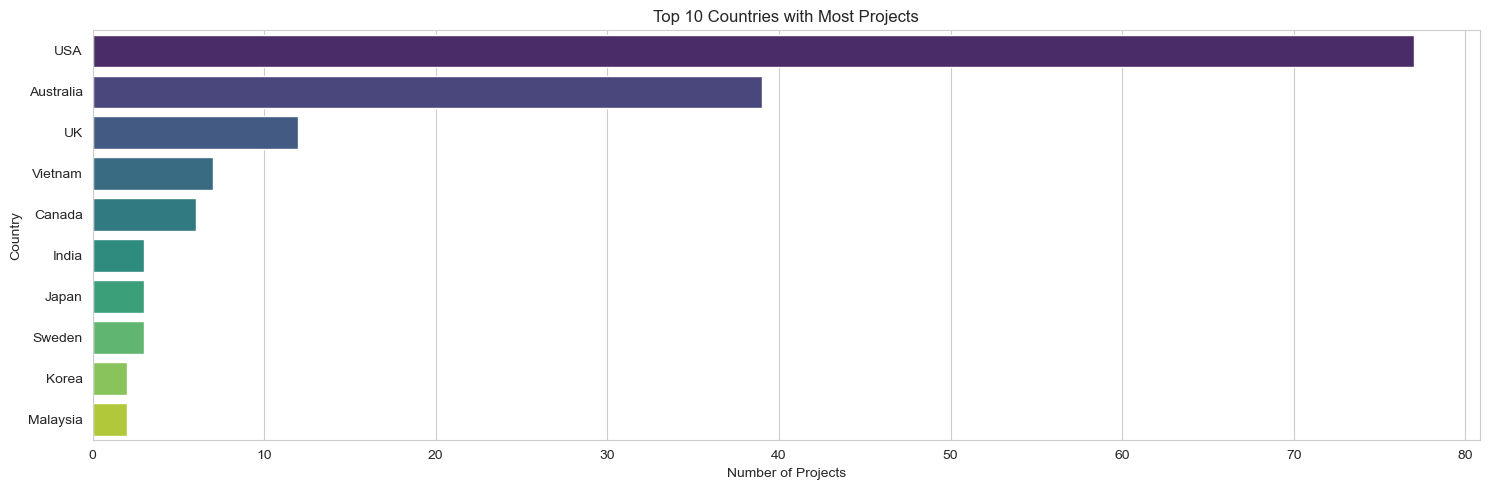

In [45]:
# Visualizations
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# Bar plot for 'Country'
country_counts = df['Country'].value_counts().nlargest(10)
sns.barplot(y=country_counts.index, x=country_counts.values, palette="viridis")
plt.title('Top 10 Countries with Most Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

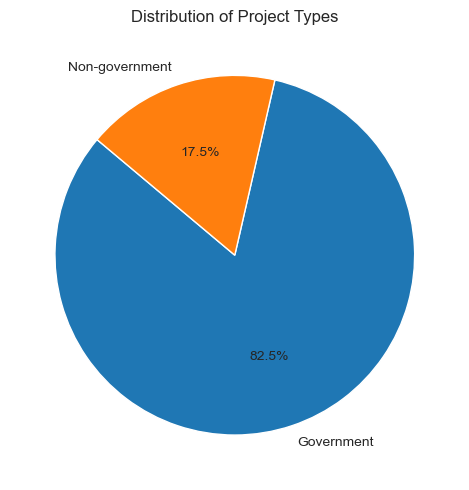

In [46]:
# Getting the counts for each unique value in the 'Type' column
type_counts = df['Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Project Types')

plt.tight_layout()
plt.show()

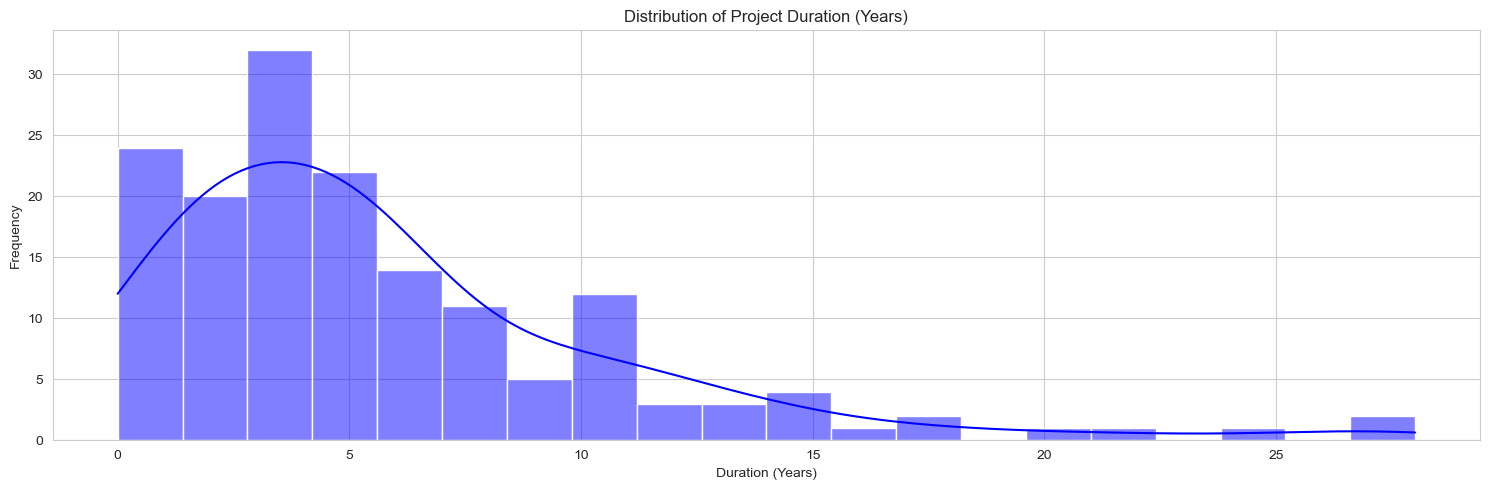

In [47]:
# Histogram for 'Duration (Years)'
plt.figure(figsize=(15, 5))
sns.histplot(df['Duration (Years)'], bins=20, kde=True, color="blue")
plt.title('Distribution of Project Duration (Years)')
plt.xlabel('Duration (Years)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

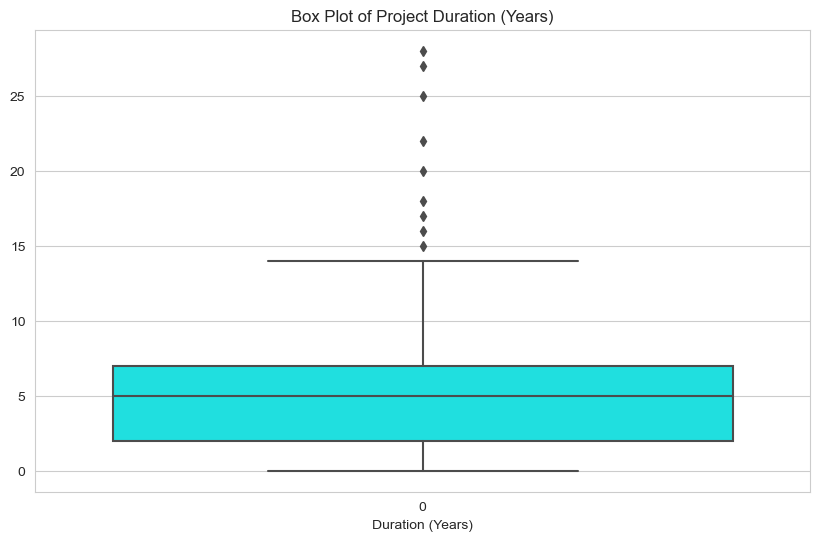

In [48]:
# Box plot for 'Duration (Years)'
plt.figure(figsize=(10, 6))
sns.boxplot(df['Duration (Years)'], color="cyan")
plt.title('Box Plot of Project Duration (Years)')
plt.xlabel('Duration (Years)')
plt.show()